<a href="https://colab.research.google.com/github/Yoshibansal/Machine-learning/blob/main/Regression/Regression_polynomial_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yoshi Bansal

E19CSE332

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/Yoshibansal/Machine-learning/main/Regression/Behavior%20of%20the%20urban%20traffic%20of%20the%20city%20of%20Sao%20Paulo%20in%20Brazil.csv'

In [3]:
raw_df = pd.read_csv(path, sep=';')
print("Dataframe shape: ", raw_df.shape)
raw_df.head()

Dataframe shape:  (135, 18)


,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [4]:
raw_df.tail()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8"
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1"
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7"
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4"
134,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"12,1"


In [5]:
raw_df.isnull().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

In [7]:
raw_df.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000


In [9]:
raw_df['Slowness in traffic (%)'] = raw_df['Slowness in traffic (%)'].str.replace(',', '.').astype(float)

In [10]:
raw_df.index

RangeIndex(start=0, stop=135, step=1)

In [11]:
raw_df.iloc[:, 0]

0       1
1       2
2       3
3       4
4       5
       ..
130    23
131    24
132    25
133    26
134    27
Name: Hour (Coded), Length: 135, dtype: int64

Night: 0-5

Morning: 6:11

Noon: 12:17

Afternoon: 18:22

Evening: 23:27

In [12]:
col = 0
for i in raw_df.index:
  if raw_df.iloc[i, col] <= 5:
    raw_df.iloc[i, col] = 'Night'

  elif raw_df.iloc[i, col] <= 11:
    raw_df.iloc[i, col] = 'Morning'

  elif raw_df.iloc[i, col] <= 17:
    raw_df.iloc[i, col] = 'Noon'

  elif raw_df.iloc[i, col] <= 22:
    raw_df.iloc[i, col] = 'Afternoon'

  elif raw_df.iloc[i, col] <= 27:
    raw_df.iloc[i, col] = 'Evening'

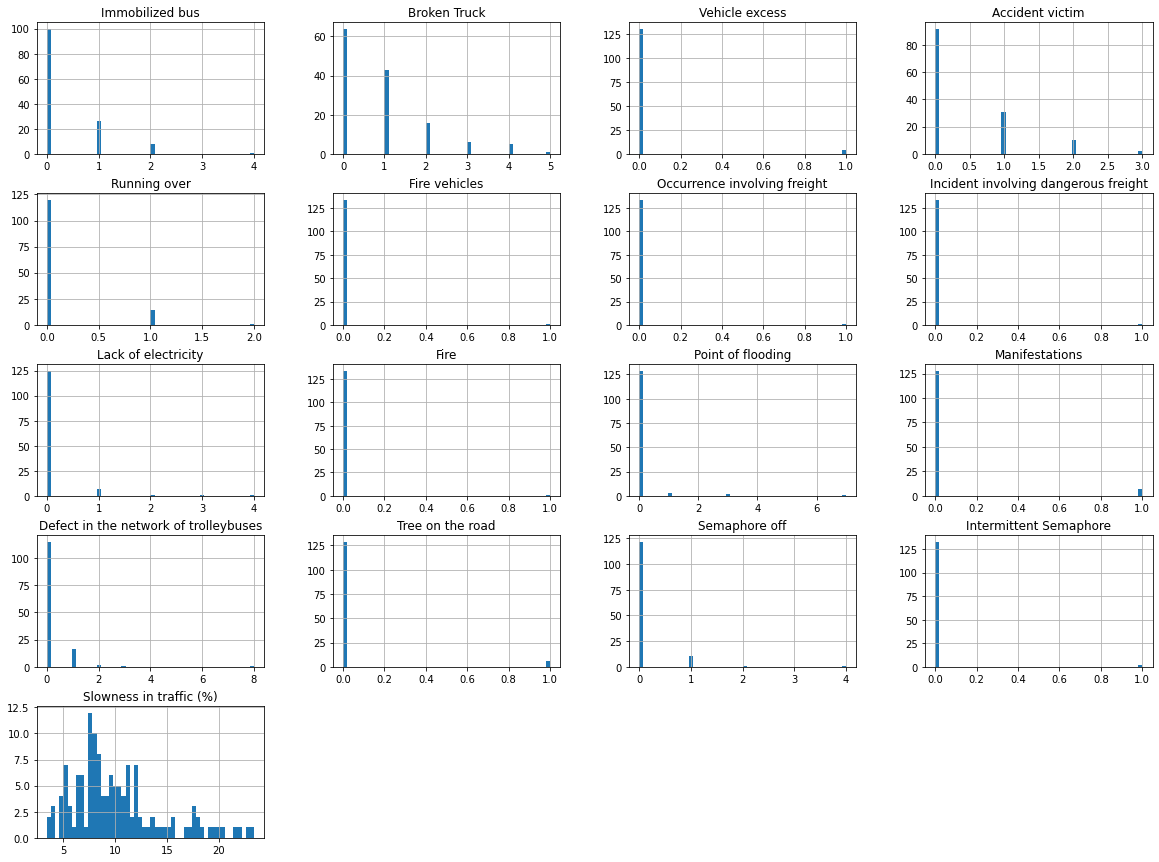

In [67]:
raw_df.hist(bins=50, figsize=(20,15));

In [72]:
import matplotlib.pyplot as plt

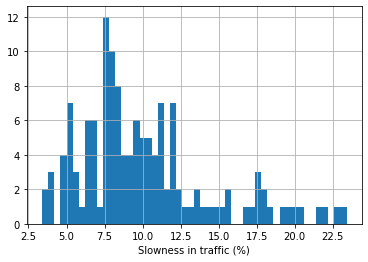

In [73]:
plt.hist(raw_df['Slowness in traffic (%)'], bins=50);
plt.xlabel("Slowness in traffic (%)")
plt.grid()
plt.show()

In [13]:
df = raw_df.copy()

In [14]:
print(*df.iloc[:, 0])

Night Night Night Night Night Morning Morning Morning Morning Morning Morning Noon Noon Noon Noon Noon Noon Afternoon Afternoon Afternoon Afternoon Afternoon Evening Evening Evening Evening Evening Night Night Night Night Night Morning Morning Morning Morning Morning Morning Noon Noon Noon Noon Noon Noon Afternoon Afternoon Afternoon Afternoon Afternoon Evening Evening Evening Evening Evening Night Night Night Night Night Morning Morning Morning Morning Morning Morning Noon Noon Noon Noon Noon Noon Afternoon Afternoon Afternoon Afternoon Afternoon Evening Evening Evening Evening Evening Night Night Night Night Night Morning Morning Morning Morning Morning Morning Noon Noon Noon Noon Noon Noon Afternoon Afternoon Afternoon Afternoon Afternoon Evening Evening Evening Evening Evening Night Night Night Night Night Morning Morning Morning Morning Morning Morning Noon Noon Noon Noon Noon Noon Afternoon Afternoon Afternoon Afternoon Afternoon Evening Evening Evening Evening Evening


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
enc = OneHotEncoder()

In [17]:
enc_ft = enc.fit_transform(df[['Hour (Coded)']])

In [18]:
type(enc_ft)

scipy.sparse.csr.csr_matrix

In [19]:
hour_encoded = pd.DataFrame(enc_ft.toarray())

In [20]:
# print(hour_encoded.to_string())

In [21]:
hour_encoded = hour_encoded.rename(columns={0:'Afternoon',1:'Evening',2:'Morning',3:'Night',4:'Noon'})

In [22]:
df = hour_encoded.join(df)

In [23]:
df.head()

,Afternoon,Evening,Morning,Night,Noon,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,0.0,0.0,0.0,1.0,0.0,Night,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,0.0,0.0,0.0,1.0,0.0,Night,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,0.0,0.0,0.0,1.0,0.0,Night,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,0.0,0.0,0.0,1.0,0.0,Night,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,0.0,0.0,0.0,1.0,0.0,Night,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [24]:
del df['Hour (Coded)']

In [25]:
df

,Afternoon,Evening,Morning,Night,Noon,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8
131,0.0,1.0,0.0,0.0,0.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1
132,0.0,1.0,0.0,0.0,0.0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7
133,0.0,1.0,0.0,0.0,0.0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4


In [26]:
df.corr()

,Afternoon,Evening,Morning,Night,Noon,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
Afternoon,1.000000,-0.227273,-0.254824,-0.227273,-0.254824,0.071991,0.054657,0.029157,0.067212,0.057257,-0.041183,-0.041183,-0.041183,-0.036535,-0.041183,-0.052702,-0.111485,-0.040682,-0.010281,0.076377,-0.058461,0.143462
Evening,-0.227273,1.000000,-0.254824,-0.227273,-0.254824,0.042980,0.019934,-0.083304,0.039716,0.002045,0.181207,-0.041183,-0.041183,0.266987,-0.041183,0.323173,0.060521,-0.064052,-0.010281,0.158865,-0.058461,0.694871
Morning,-0.254824,-0.254824,1.000000,-0.254824,-0.285714,0.021083,0.045061,0.011675,-0.094200,0.126104,-0.046176,-0.046176,-0.046176,-0.090593,0.161615,-0.089194,-0.044643,-0.084918,-0.028820,-0.068509,-0.065547,-0.214182
Night,-0.227273,-0.227273,-0.254824,1.000000,-0.254824,-0.131089,-0.223131,0.029157,-0.180250,-0.053168,-0.041183,-0.041183,-0.041183,-0.112415,-0.041183,-0.079550,0.060521,0.263133,0.174785,-0.088598,0.257226,-0.394349
Noon,-0.254824,-0.254824,-0.285714,-0.254824,1.000000,-0.006024,0.093727,0.011675,0.162708,-0.131836,-0.046176,0.161615,0.161615,-0.019694,-0.046176,-0.089194,0.035714,-0.063082,-0.115278,-0.068509,-0.065547,-0.200656
Immobilized bus,0.071991,0.042980,0.021083,-0.131089,-0.006024,1.000000,0.141517,0.175262,0.025638,0.246290,0.086644,0.086644,0.218071,0.057134,-0.044782,-0.054769,0.082074,0.019847,-0.002430,0.005055,0.029712,0.101143
Broken Truck,0.054657,0.019934,0.045061,-0.223131,0.093727,0.141517,1.000000,-0.059513,0.264286,0.117450,0.009904,0.088556,0.088556,0.107544,0.009904,0.142570,0.087644,0.040531,-0.008000,0.220850,-0.041765,0.131998
Vehicle excess,0.029157,-0.083304,0.011675,0.029157,0.011675,0.175262,-0.059513,1.000000,0.082586,-0.059963,-0.015095,-0.015095,-0.015095,-0.041205,-0.015095,-0.029158,-0.040864,0.004362,-0.037686,-0.047592,-0.021428,-0.045297
Accident victim,0.067212,0.039716,-0.094200,-0.180250,0.162708,0.025638,0.264286,0.082586,1.000000,0.038484,0.071968,-0.052592,0.071968,0.111446,-0.052592,0.048789,-0.094200,0.077375,-0.079469,0.134497,-0.074656,0.121730
Running over,0.057257,0.002045,0.126104,-0.053168,-0.131836,0.246290,0.117450,-0.059963,0.038484,1.000000,-0.029644,-0.029644,-0.029644,-0.038246,-0.029644,-0.027065,0.016480,0.008567,0.030065,-0.093461,0.135446,-0.001133


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

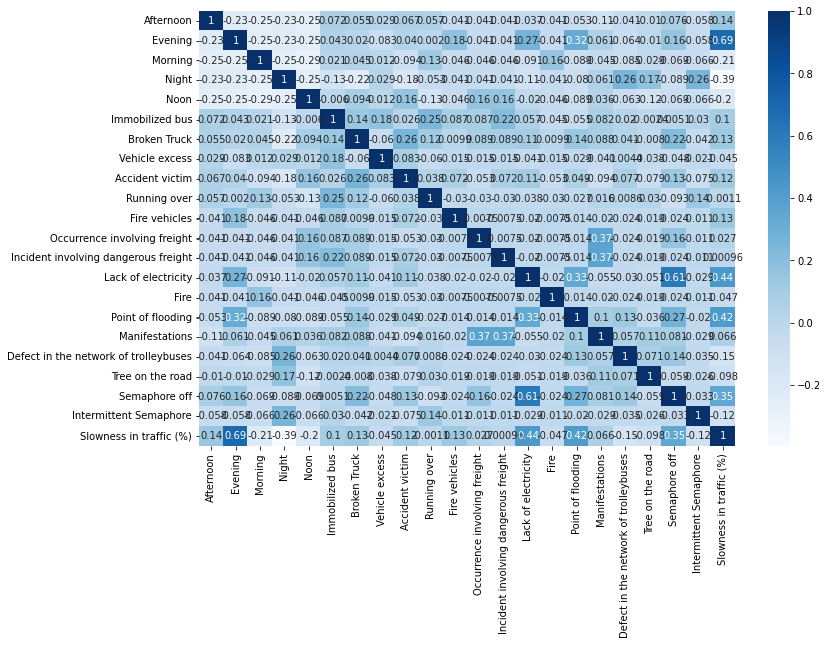

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

In [29]:
corr_matrix = df.corr()
corr_matrix['Slowness in traffic (%)'].sort_values(ascending=False)

Slowness in traffic (%)                  1.000000
Evening                                  0.694871
Lack of electricity                      0.436569
Point of flooding                        0.420016
Semaphore off                            0.347242
Afternoon                                0.143462
Fire vehicles                            0.134103
Broken Truck                             0.131998
Accident victim                          0.121730
Immobilized bus                          0.101143
Manifestations                           0.066377
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Running over                            -0.001133
Vehicle excess                          -0.045297
Fire                                    -0.046737
Tree on the road                        -0.098489
Intermittent Semaphore                  -0.119942
Defect in the network of trolleybuses   -0.147035
Noon                                    -0.200656


In [30]:
df = df.to_numpy()

In [31]:
X = df[:, :-1]
y = df[:, -1:]

In [32]:
print("X shape: ", X.shape)
print("X type: ", type(X))

print("y shape: ", y.shape)
print("y type: ", type(y))

X shape:  (135, 21)
X type:  <class 'numpy.ndarray'>
y shape:  (135, 1)
y type:  <class 'numpy.ndarray'>


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [35]:
print("X train shape", X_train.shape)
print("y train shape", y_train.shape)

print("X test shape", X_test.shape)
print("y test shape", y_test.shape)

X train shape (108, 21)
y train shape (108, 1)
X test shape (27, 21)
y test shape (27, 1)


In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [92]:
#@title Degree
degree = 2 #@param {type:"slider", min:1, max:4, step:1}

model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [93]:
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print("RMSE train: ", rmse_train)
print("R2 train: ", r2_train)

RMSE train:  1.4283650054514088
R2 train:  0.8939187862145336


In [119]:
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print("RMSE test: ", rmse_test)
print("R2 test: ", r2_test)

RMSE test:  6.455988488088276
R2 test:  -1.3858501383727586


In [ ]:
# print(pd.DataFrame(X_train).to_string())

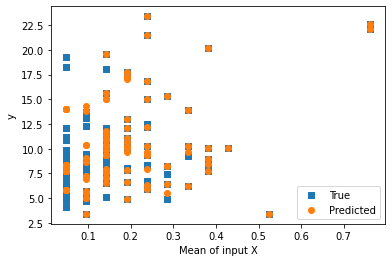

In [117]:
plt.scatter(X_train.mean(axis=1), y_train, marker='s', label='True');
plt.scatter(X_train.mean(axis=1), y_train_pred, marker='o', label='Predicted');
plt.legend(loc='lower right');
plt.xlabel("Mean of input X")
plt.ylabel("y")
plt.show()

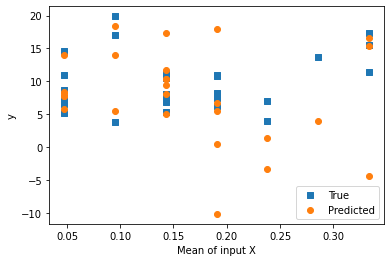

In [120]:
plt.scatter(X_test.mean(axis=1), y_test, marker='s', label='True');
plt.scatter(X_test.mean(axis=1), y_test_pred, marker='o', label='Predicted');
plt.legend(loc='lower right');
plt.xlabel("Mean of input X")
plt.ylabel("y")
plt.show()